# KMeans

In [ ]:
https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen2.csv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances    

In [ ]:
#Memanggil dataset dari github
Dataset = pd.read_csv('https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen2.csv')
Dataset.keys()

Index(['Gaji', 'Pengeluaran'], dtype='object')

In [ ]:
#Menampilkan 5 baris pertama dataset
dataku = pd.DataFrame(Dataset)
dataku.head()

,Gaji,Pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [ ]:
#konversi data ke array
X = np.asarray(Dataset)
print(X)

[[ 2500  1750]
 [ 3800  4200]
 [ 3900  3800]
 [ 4350  5500]
 [ 4400  3200]
 [ 5500  5450]
 [ 5600  5950]
 [ 5750  4100]
 [ 6850  6050]
 [ 6900  8500]
 [ 7250  9500]
 [ 7350  6050]
 [ 7500  8500]
 [ 7800  9500]
 [ 8200  8300]
 [ 8500  6500]
 [ 8550  8400]
 [ 8750  6000]
 [ 9100 10500]
 [ 9100  8500]]


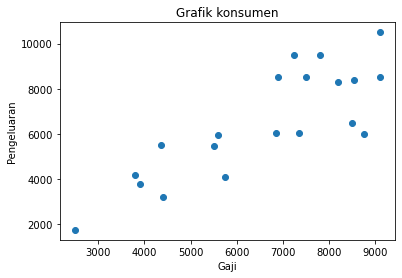

In [ ]:
#menampilkan data as scatter plot
plt.scatter(X[:,0] ,X[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik konsumen")
plt.show()

In [ ]:
#mengaktifkan K Means dgn K = 2
kmeans = KMeans(n_clusters=2, random_state=4)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=4)

In [ ]:
#menampilkan nilai centroid yang digenerate algo
print(kmeans.cluster_centers_)

[[7987.5  8025.  ]
 [4475.   4243.75]]


In [ ]:
#menampilkan label data point
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#menghitung silhoute score
metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

0.5554663423362192

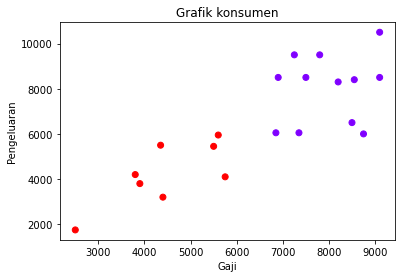

In [ ]:
#plot data point, memvisualisasikan ttitik yg telah diklasterkan

plt.scatter(X[:,0] ,X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik konsumen")
plt.show()

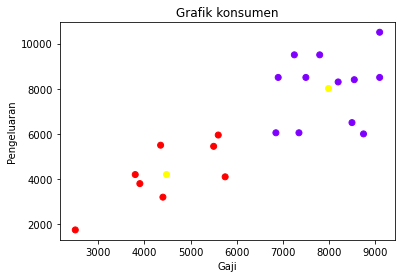

In [ ]:
#plot data point, visualisasi data yg telah diklaster, menampilkan centroid
plt.scatter(X[:,0] ,X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik konsumen")
plt.show()

In [ ]:
#melakukan pencarian k terbaik
ks = 10
sil_score = np.zeros(ks) #wadah array u/ menyimpan sil_houte sbnyk ks
for k in range(1, ks+1):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(X)
    
    if k!=1: #k tdk blh = 1 krn dia menghitung jarak antara 2 centroid or lebuh
        s_score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
        sil_score[k-1] = s_score
        
sil_score

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0.        , 0.55546634, 0.46139304, 0.46112701, 0.45770278,
       0.40415459, 0.41441123, 0.427705  , 0.42968032, 0.44850758])

<function matplotlib.pyplot.show(close=None, block=None)>

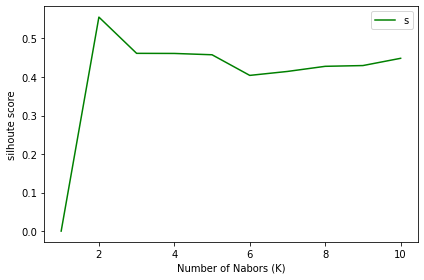

In [ ]:
#menampilkan hasil silhoutte tiap K

plt.plot(range(1, ks+1),sil_score,'g')
plt.legend(('silhouete score'))
plt.ylabel('silhoute score')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show